# KIDNEY STONE PREDICTION MODEL

![https://www.google.com/search?rlz=1C5CHFA_enIN1025IN1039&q=kidney+stone&tbm=isch&sa=X&ved=2ahUKEwit_fCBoM__AhXqSWwGHTH8BAgQ0pQJegQIDBAB&biw=804&bih=623&dpr=2#imgrc=AD-TR6Y1Km8eIM](http://)Did you know that kidney stones are common with an estimated prevalence of 12% in men and 6% in women? These small mineral deposits can cause excruciating pain and significantly impact everyday life. Kidney stones account for over 500,000 emergency room visits in the United States alone!

# IMPORTING DATA

In [36]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA

sns.set_style('whitegrid')
sns.set_palette('Set2')
pd.options.plotting.backend = 'plotly'

%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [4]:
kd=pd.read_csv('/kaggle/input/playground-series-s3e12/sample_submission.csv')
print(kd.shape)
print('-'*50)
train_df = pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
print(train_df.shape)
print('-'*50)

test_df = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
print(test_df.shape)
print('-'*50)
test_df.columns

(276, 2)
--------------------------------------------------
(414, 8)
--------------------------------------------------
(276, 7)
--------------------------------------------------


Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

# EDA

In [5]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


# HEATMAP

<Axes: >

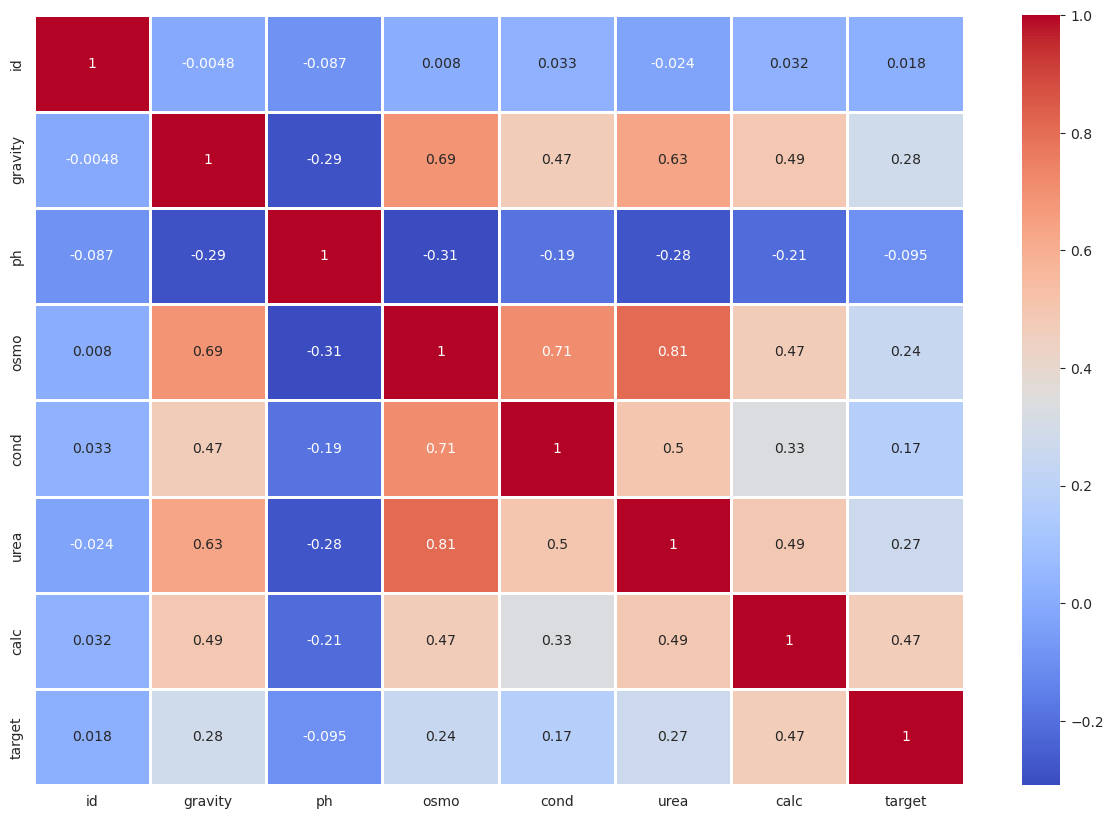

In [6]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train_df.corr(),annot=True,lw=2,linecolor='white',cmap='coolwarm')

# PAIR PLOT

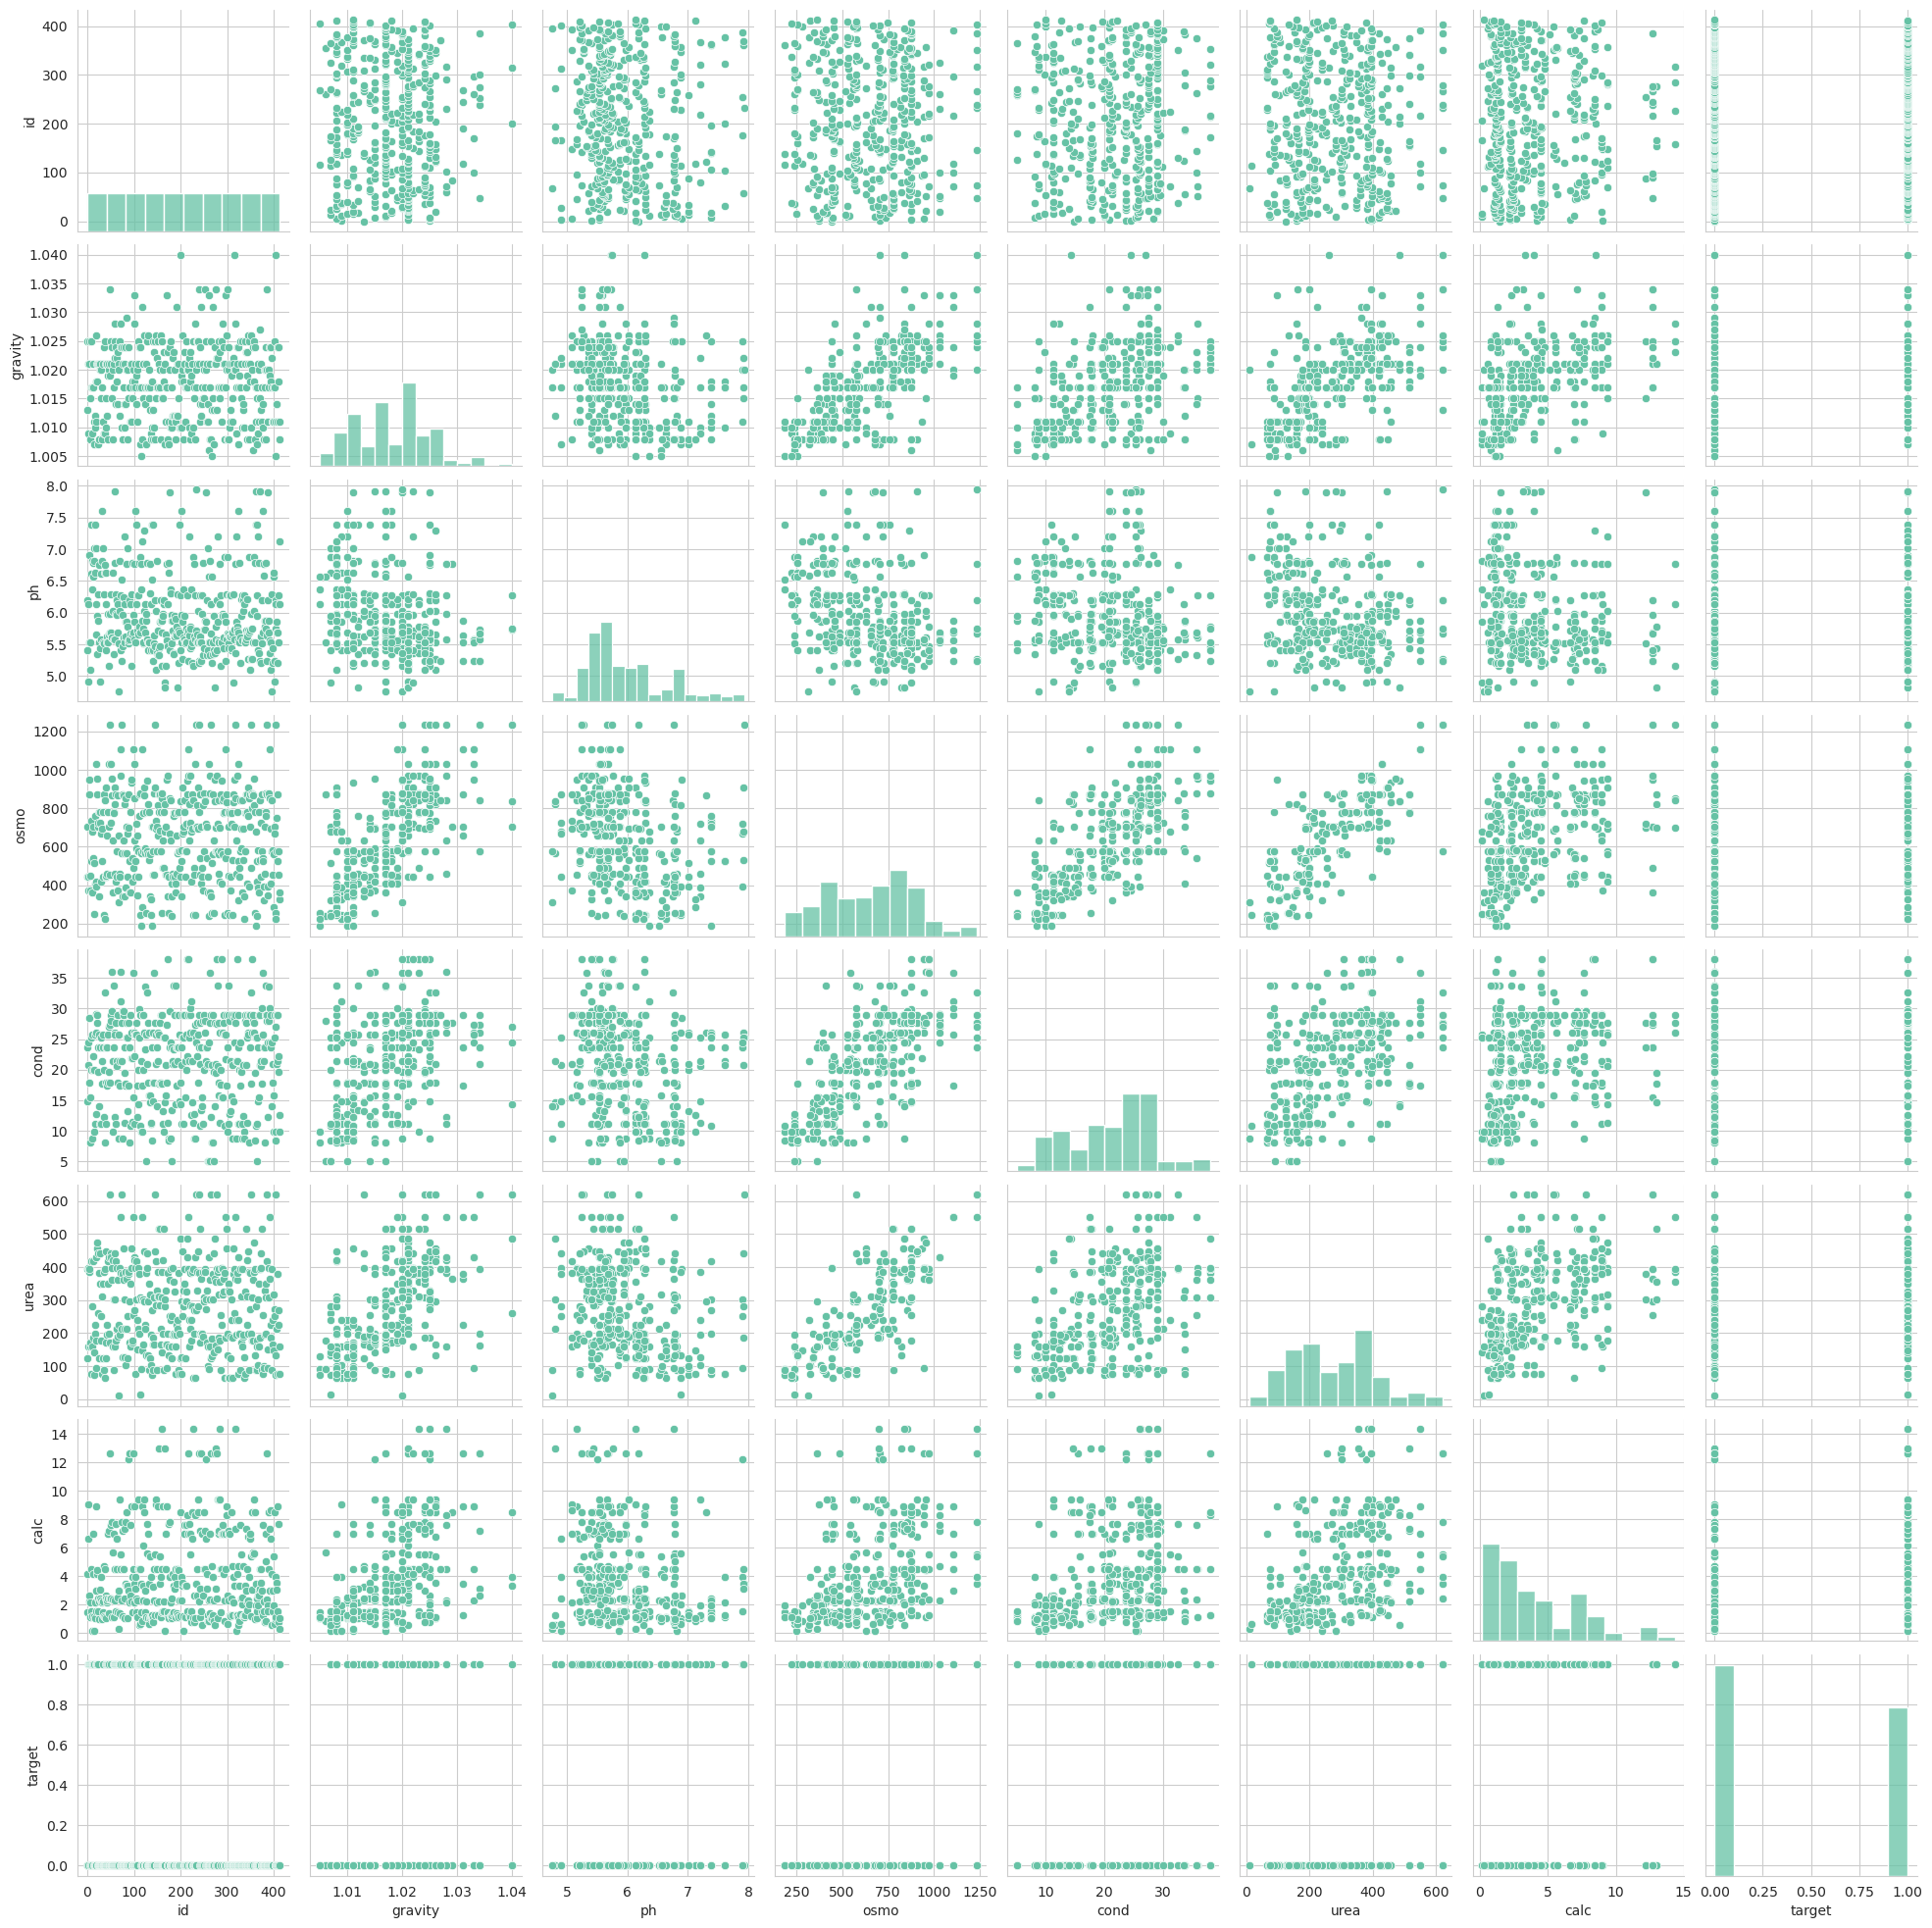

In [25]:
sns.pairplot(train_df)

#  SUBPLOT

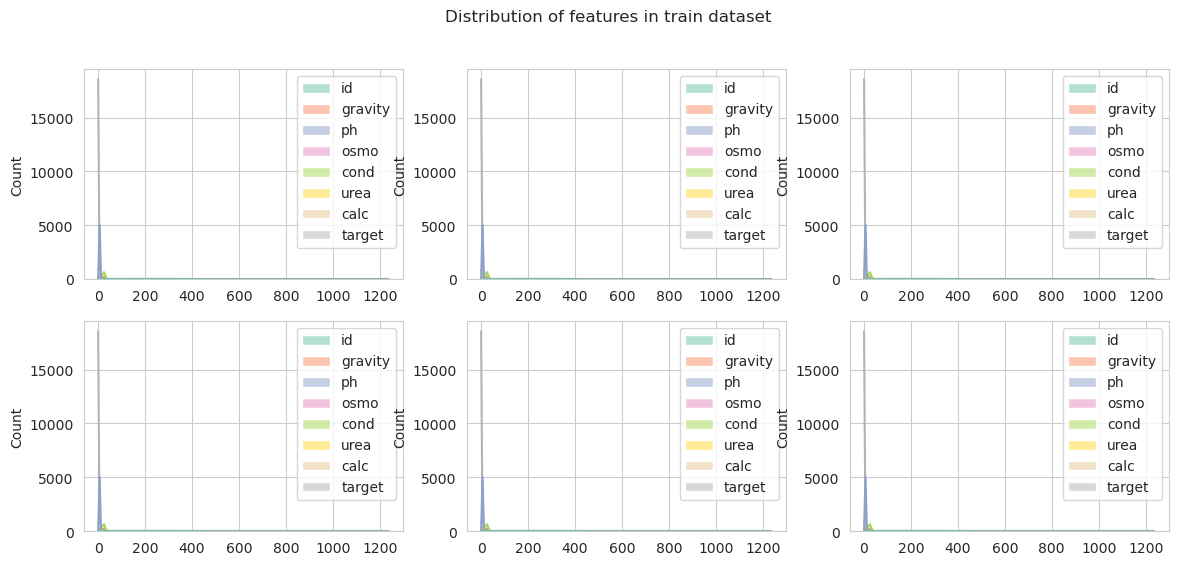

In [35]:
fig, axes = plt.subplots(2, 3, figsize = (14,6))
fig.suptitle('Distribution of features in train dataset')
for i in range(6):
    sns.histplot(data = train_df, ax = axes[i//3, i%3], kde = True)
plt.show()

# HISTPLOT

In [7]:
train_df.hist()

In [8]:
train_df.drop('id', axis=1).boxplot()

# BOX PLOT

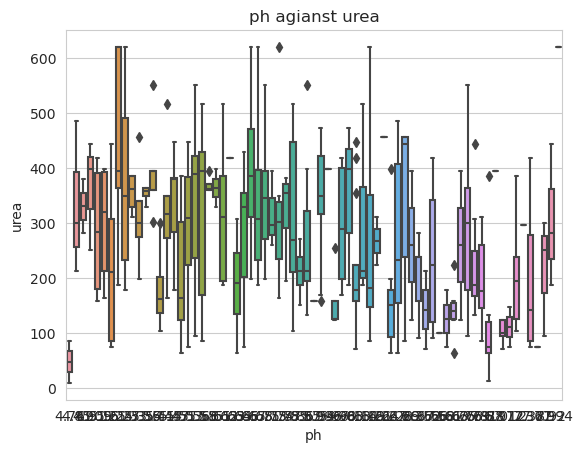

In [9]:
# Outlier Detection
sns.boxplot(x='ph', y='urea', data=train_df)
plt.xlabel('ph')
plt.ylabel('urea')
plt.title('ph agianst urea')
plt.show()

# NORMALISING THE DATA

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df)

In [15]:
X = train_df.drop('target',axis = 1)
y =  train_df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# LogisticRegression

In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in lr.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        75
           1       0.80      0.63      0.70        62

    accuracy                           0.76       137
   macro avg       0.77      0.75      0.75       137
weighted avg       0.76      0.76      0.75       137

0.8316129032258064


# RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict = rf.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in rf.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        75
           1       0.79      0.66      0.72        62

    accuracy                           0.77       137
   macro avg       0.77      0.76      0.76       137
weighted avg       0.77      0.77      0.76       137

0.8381720430107527


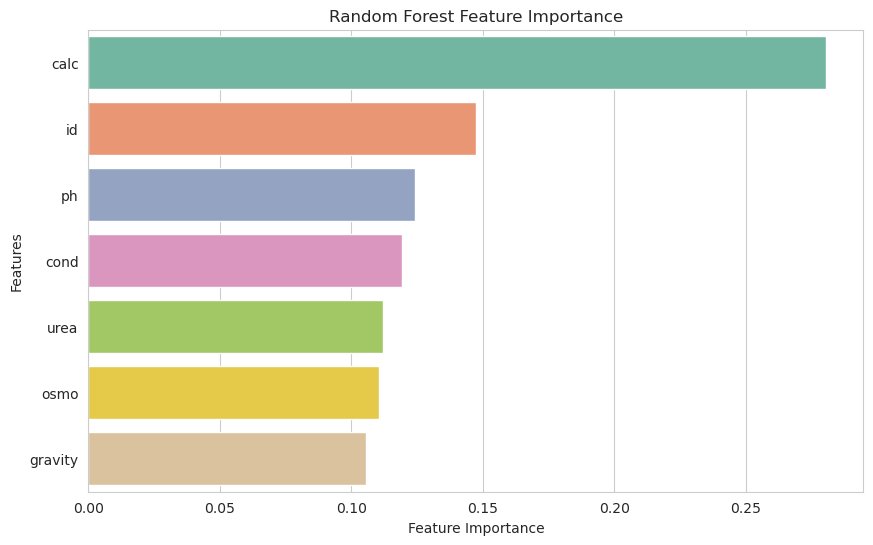

In [19]:
# Feature importance
feature_importance = rf.feature_importances_

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Sort feature names accordingly
feature_names = X_train.columns[sorted_idx]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# DecisionTreeClassifier

In [14]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
predict = dc.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in dc.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        75
           1       0.60      0.63      0.61        62

    accuracy                           0.64       137
   macro avg       0.64      0.64      0.64       137
weighted avg       0.64      0.64      0.64       137

0.6411827956989247


# 

# GradientBoostingClassifier

In [15]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
predict = gbr.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in gbr.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        75
           1       0.80      0.58      0.67        62

    accuracy                           0.74       137
   macro avg       0.76      0.73      0.73       137
weighted avg       0.75      0.74      0.74       137

0.8397849462365591


# 

# KNN Classifier

In [16]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
predict = kn.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in kn.predict_proba(X_test)]))


              precision    recall  f1-score   support

           0       0.60      0.72      0.65        75
           1       0.55      0.42      0.48        62

    accuracy                           0.58       137
   macro avg       0.58      0.57      0.57       137
weighted avg       0.58      0.58      0.57       137

0.547741935483871


# SVC

In [17]:
sv = SVC()
sv.fit(X_train,y_train)
predict = sv.predict(X_test)
print (classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.67      0.76      0.71        75
           1       0.65      0.55      0.60        62

    accuracy                           0.66       137
   macro avg       0.66      0.65      0.65       137
weighted avg       0.66      0.66      0.66       137



# LGBM Classifier

In [18]:
lg = LGBMClassifier()
lg.fit(X_train,y_train)
predict = lg.predict(X_test)
print (classification_report(y_test,predict))
print(roc_auc_score(y_test, [x[1] for x in lg.predict_proba(X_test)]))



              precision    recall  f1-score   support

           0       0.71      0.84      0.77        75
           1       0.75      0.58      0.65        62

    accuracy                           0.72       137
   macro avg       0.73      0.71      0.71       137
weighted avg       0.73      0.72      0.72       137

0.8053763440860215


# ENSEMBLE

In [19]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('gbr', gbr),
                                     ('rf', rf),('lr',lr),('lg',lg)],
                        voting='soft')

model.fit(X_train, y_train)

print(roc_auc_score(y_test, [x[1] for x in model.predict_proba(X_test)]))

0.8576344086021506


# PREPROSSING THE TEST DATA

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_df)

In [20]:
ensemble_preds = model.predict_proba(test_df)
predicted_probs_ensemble = np.array([pred[1] for pred in ensemble_preds])

# PREDICTION DATAFRAME

In [21]:
submission_df = pd.DataFrame({
"id" :test_df['id'],
"targets": predicted_probs_ensemble
})
submission_df.shape

(276, 2)

In [32]:
submission_df.head(10)

,id,targets
0,414,0.258529
1,415,0.702043
2,416,0.792512
3,417,0.432228
4,418,0.382753
5,419,0.706928
6,420,0.585869
7,421,0.587628
8,422,0.245957
9,423,0.404804


# DATAFRAME TO CSV CONVERSION

In [28]:
submission_df.to_csv("submission28.csv", index=False) 

# Thank you